<a href="https://colab.research.google.com/github/henryduke2/ds_3001_ans/blob/main/lab_notebook_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

Question 1: Clean the data and perform some EDA and visualization to get to know the data set.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               976 non-null    object
 1   Make_Year          976 non-null    int64 
 2   Color              976 non-null    object
 3   Body_Type          976 non-null    object
 4   Mileage_Run        976 non-null    int64 
 5   No_of_Owners       976 non-null    object
 6   Seating_Capacity   976 non-null    int64 
 7   Fuel_Type          976 non-null    object
 8   Transmission       976 no

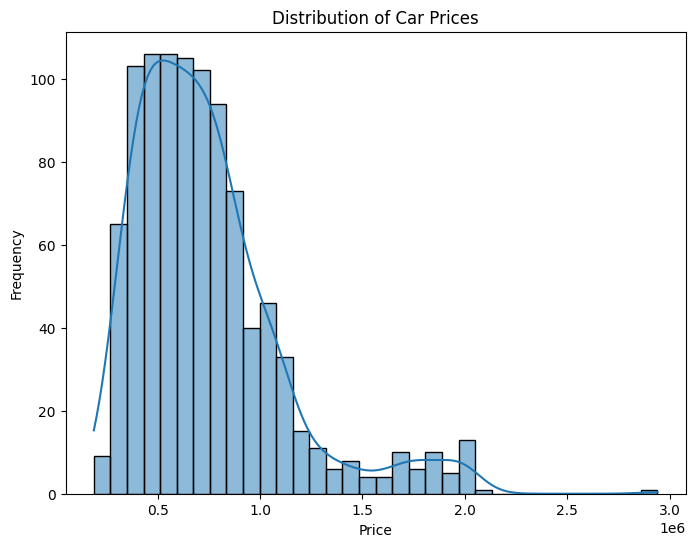

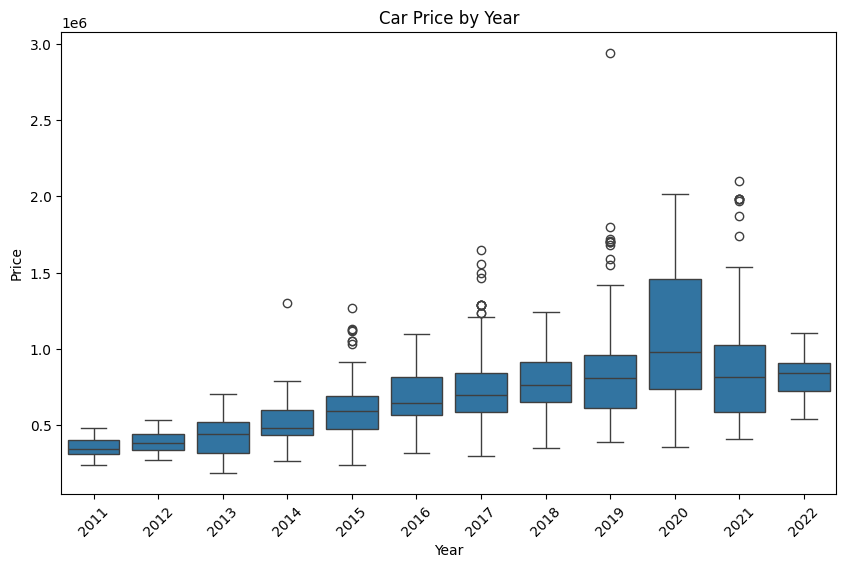

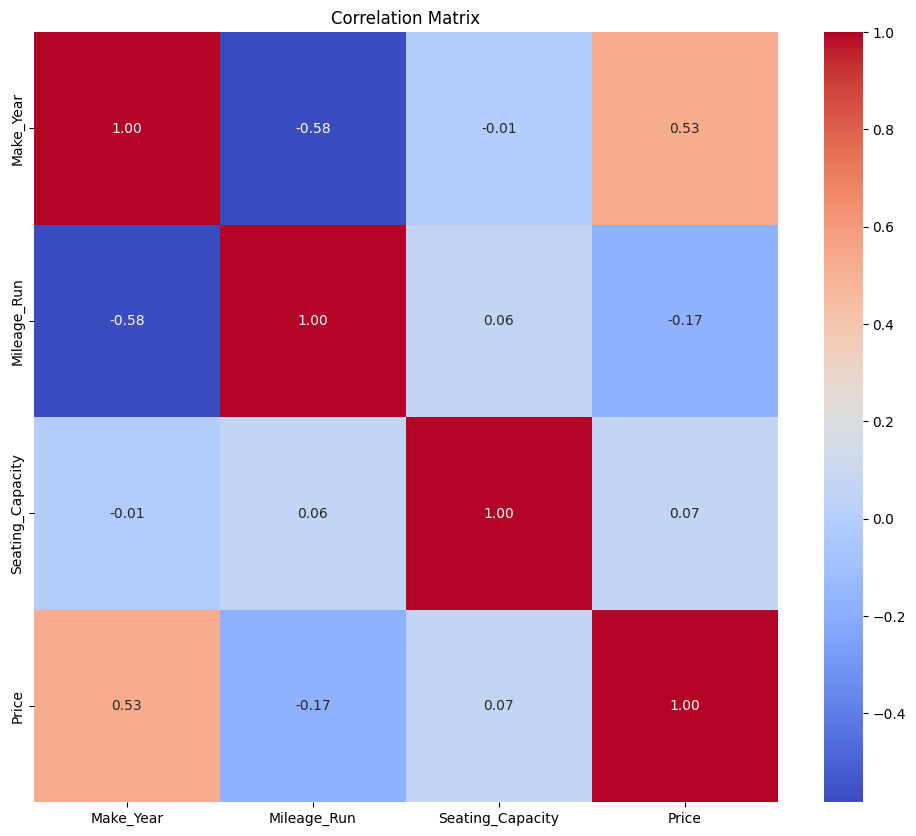

In [ ]:
#Coding help from gemini

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
try:
  df = pd.read_csv('/content/drive/MyDrive/DS 3001/cars_hw.csv')
  # Drop the column "Unnamed: 0" if it exists
  if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
except FileNotFoundError:
  print("Error: File not found. Please make sure the file 'cars_hw.csv' exists in your Google Drive and the path is correct.")
  df = pd.DataFrame() # Create an empty DataFrame to avoid errors later


# Data Cleaning and EDA
if not df.empty:
  # Check for missing values
  print(df.isnull().sum())

  # Fill missing values (example: fill with mean for numerical columns)
  for col in df.select_dtypes(include=np.number):
      df[col] = df[col].fillna(df[col].mean())

  # Drop rows with missing values in categorical columns (or fill with mode)
  df.dropna(subset=df.select_dtypes(exclude=np.number).columns, inplace=True)

  # Explore data types and summary statistics
  print(df.info())
  print(df.describe())

  # Visualizations
  # Histogram of 'price'
  plt.figure(figsize=(8, 6))
  sns.histplot(df['Price'], kde=True)
  plt.title('Distribution of Car Prices')
  plt.xlabel('Price')
  plt.ylabel('Frequency')
  plt.show()

  # Boxplot of 'price' by 'year'
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Make_Year', y='Price', data=df)
  plt.title('Car Price by Year')
  plt.xlabel('Year')
  plt.ylabel('Price')
  plt.xticks(rotation=45)
  plt.show()

  # Correlation Matrix Heatmap
  numerical_df = df.select_dtypes(include=np.number)
  plt.figure(figsize=(12, 10))
  sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix')
  plt.show()


Question 2: Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [ ]:
#Code help from gemini

# Transform categorical variables using one-hot encoding
categorical_cols = df.select_dtypes(exclude=np.number).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())


   Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  Make_Ford  \
0       2017        44611                 5  657000        False      False   
1       2016        20305                 5  682000        False      False   
2       2019        29540                 5  793000        False      False   
3       2017        35680                 5  414000        False      False   
4       2017        25126                 5  515000        False      False   

   Make_Honda  Make_Hyundai  Make_Jeep  Make_Kia  ...  Body_Type_suv  \
0       False         False      False     False  ...          False   
1       False          True      False     False  ...          False   
2        True         False      False     False  ...           True   
3       False         False      False     False  ...          False   
4       False          True      False     False  ...          False   

   No_of_Owners_2nd  No_of_Owners_3rd  Fuel_Type_petrol  Fuel_Type_petrol+cng  \
0          

Question 3: Implement an 80/20 train-test split. Put the test data aside.

In [ ]:
#Code help from gemini
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility



Question 4: Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  R2  on the both the training and test sets. Which of your models does the best?

In [ ]:
#Code help from gemini
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and R-squared for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")


Training RMSE: 142114.26056968494
Training R-squared: 0.8553060847751646
Test RMSE: 143575.1966058975
Test R-squared: 0.8202733305989025


Question 5: Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

<Figure size 800x600 with 0 Axes>

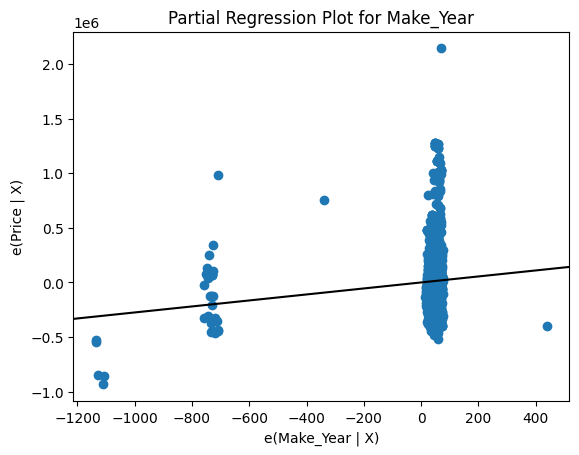

<Figure size 800x600 with 0 Axes>

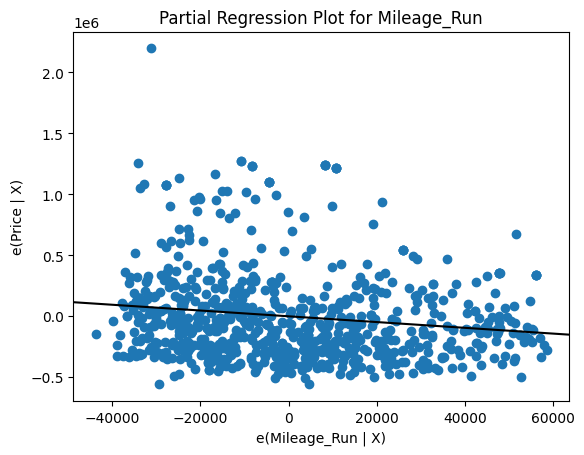

<Figure size 800x600 with 0 Axes>

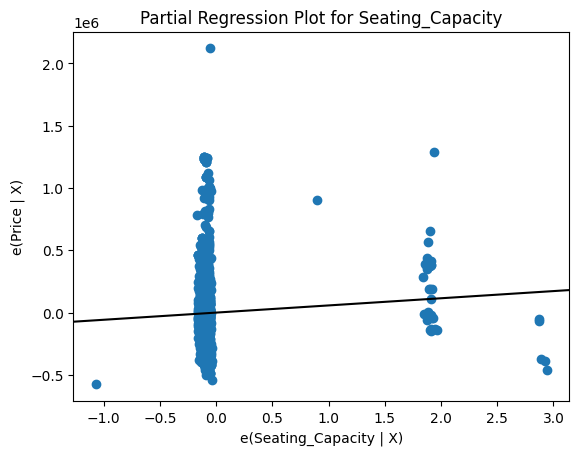

In [ ]:
#Code help from gemini
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress

# Identify numeric columns in X_train
numeric_cols = X_train.select_dtypes(include=np.number).columns

for col in numeric_cols:
    fig = plt.figure(figsize=(8, 6))
    exog_others_numeric = X_train.drop(columns=[col]).select_dtypes(include=np.number)
    plot_partregress(endog=y_train, exog_i=X_train[col],
                     exog_others= exog_others_numeric,
                     data=pd.concat([X_train, y_train], axis=1), obs_labels=False)
    plt.title(f"Partial Regression Plot for {col}")
    plt.show()



Yes, both the Make_Year and Seating_capacity are significant non-linearities.

Question 6: Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  R2  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [ ]:
#Code help from gemini

# Create interaction terms and transformations
X_train['Year_Squared'] = X_train['Make_Year'] ** 2
X_train['Mileage_Log'] = np.log1p(X_train['Mileage_Run'])  # Log transformation of mileage
X_train['Year_Mileage'] = X_train['Make_Year'] * X_train['Mileage_Run'] # Interaction term

X_test['Year_Squared'] = X_test['Make_Year'] ** 2
X_test['Mileage_Log'] = np.log1p(X_test['Mileage_Run'])
X_test['Year_Mileage'] = X_test['Make_Year'] * X_test['Mileage_Run']

# Fit the complex model
complex_model = LinearRegression()
complex_model.fit(X_train, y_train)

# Make predictions
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

# Evaluate the complex model
rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
r2_train_complex = r2_score(y_train, y_train_pred_complex)
rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
r2_test_complex = r2_score(y_test, y_test_pred_complex)

print(f"Complex Model - Training RMSE: {rmse_train_complex}")
print(f"Complex Model - Training R-squared: {r2_train_complex}")
print(f"Complex Model - Test RMSE: {rmse_test_complex}")
print(f"Complex Model - Test R-squared: {r2_test_complex}")

# Compare with the simple model
print("\nComparison:")
print(f"Simple Model - Test RMSE: {rmse_test}")
print(f"Simple Model - Test R-squared: {r2_test}")


Complex Model - Training RMSE: 140760.27068149665
Complex Model - Training R-squared: 0.8580500854701123
Complex Model - Test RMSE: 142490.67225908287
Complex Model - Test R-squared: 0.8229782793255954

Comparison:
Simple Model - Test RMSE: 143575.1966058975
Simple Model - Test R-squared: 0.8202733305989025


The complex models seem to perform pretty similarly to the simple model, but with slightly lower RMSE.

Question 7: Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

Based on the results from this exercise, I think there are two takeaways. First, since the model performs slightly better with the training data rather than the test data, we can see that the model is slightly overfitting. Second, since we see that there is not a huge difference between the complex model and the simple model in terms of R^2 or RMSE, it shows us that more coplex is not always better. If the performance statistics are similar, we would lean towards the simpler model for better interpretability.


Question 8: If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and  R2 ?

In [ ]:
#code help from gemini
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale the features (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1) # You can tune alpha
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the Lasso model
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Model - Training RMSE: {rmse_train_lasso}")
print(f"Lasso Model - Training R-squared: {r2_train_lasso}")
print(f"Lasso Model - Test RMSE: {rmse_test_lasso}")
print(f"Lasso Model - Test R-squared: {r2_test_lasso}")

# Identify the selected features (coefficients != 0)
selected_features = X_train.columns[lasso_model.coef_ != 0]
print("\nSelected Features:")
selected_features


Lasso Model - Training RMSE: 140940.02595265626
Lasso Model - Training R-squared: 0.8576873050097487
Lasso Model - Test RMSE: 143089.7731430679
Lasso Model - Test R-squared: 0.8214865771815123

Selected Features:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.436e+12, tolerance: 1.089e+10
  model = cd_fast.enet_coordinate_descent(


Index(['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Make_Datsun',
       'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep', 'Make_Kia',
       'Make_MG Motors', 'Make_Mahindra', 'Make_Maruti Suzuki', 'Make_Nissan',
       'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Color_black', 'Color_blue', 'Color_bronze',
       'Color_brown', 'Color_golden', 'Color_green', 'Color_grey',
       'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_hatchback',
       'Body_Type_muv', 'Body_Type_sedan', 'Body_Type_suv', 'No_of_Owners_2nd',
       'No_of_Owners_3rd', 'Fuel_Type_petrol', 'Fuel_Type_petrol+cng',
       'Transmission_5-Speed', 'Transmission_6-Speed', 'Transmission_7-Speed',
       'Transmission_CVT', 'Transmission_Type_Manual', 'Year_Squared',
       'Mileage_Log', 'Year_Mileage'],
      dtype='object')